In [1]:
import pandas as pd
import numpy as np

score_name = 'CSI'

df = pd.read_csv('../data/total/' + score_name + '.csv')
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.index[0])
df.columns = [0, 1, 2, 3]
df.loc['emotion'] = ['None', 'None', 'exist', 'exist']
df.loc['TP'] = ['Low', 'High', 'Low', 'High']
df

,0,1,2,3
1,-0.678226457,2.625969743,2.188342979,0.702668582
2,0.779612608,0.137566902,0.584318673,0.829530269
3,0.947787112,1.383945348,0.038073524,0.467828274
4,1.114913975,1.522376322,-0.156875174,0.803494653
5,1.183868143,0.684861029,0.196163549,1.000968914
emotion,None,None,exist,exist
TP,Low,High,Low,High


In [2]:
df = df.drop(df.index[1])
df

,0,1,2,3
1,-0.678226457,2.625969743,2.188342979,0.702668582
3,0.947787112,1.383945348,0.038073524,0.467828274
4,1.114913975,1.522376322,-0.156875174,0.803494653
5,1.183868143,0.684861029,0.196163549,1.000968914
emotion,None,None,exist,exist
TP,Low,High,Low,High


In [3]:
df_long = pd.DataFrame()
for i in df.columns:
    df_temp = pd.DataFrame()
    emo = df[i].loc['emotion']
    df_temp['emotion'] = [emo, emo, emo, emo]
    tp = df[i].loc['TP']
    df_temp['TP'] = [tp, tp, tp, tp]
    df_temp['score'] = [float(df[i].values[j]) for j in range(0,4)]
    df_long = pd.concat([df_long, df_temp])
df_long

,emotion,TP,score
0,None,Low,-0.678226
1,None,Low,0.947787
2,None,Low,1.114914
3,None,Low,1.183868
0,None,High,2.625970
1,None,High,1.383945
2,None,High,1.522376
3,None,High,0.684861
0,exist,Low,2.188343
1,exist,Low,0.038074


Text(0.5, 1.0, 'CSI')

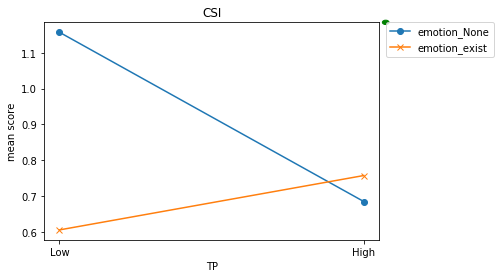

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot([df_long.loc[df_long['emotion']=='None']['score'].values[0:7].mean(),
          df_long.loc[df_long['emotion']=='None']['score'].values[7:14].mean()],
        marker = 'o', label='emotion_None')
ax.plot([df_long.loc[df_long['emotion']=='exist']['score'].values[0:7].mean(),
          df_long.loc[df_long['emotion']=='exist']['score'].values[5:14].mean()],
        marker = 'x', label = 'emotion_exist')
plt.xticks([0, 1], ['Low', 'High'])
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0,), borderaxespad=0)
circle = plt.Circle((1.02, 1.0,), 0.01, color='g', clip_on=False, transform=ax.transAxes)
ax.add_artist(circle)
plt.ylabel('mean score')
plt.xlabel('TP')
ax.set_title(score_name)